# **Monografía**
# **Breast Cancer Classifier**

### Estudiante:


**Nombre Completo:** Juan Camilo Peña Vahos

**Cédula:** 1020474173



In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16kUWvBmfYPlr5kdwGt9FheBCd7celt14' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16kUWvBmfYPlr5kdwGt9FheBCd7celt14" -O dataset.zip && rm -rf /tmp/cookies.txt

--2022-05-09 23:28:00--  https://docs.google.com/uc?export=download&confirm=&id=16kUWvBmfYPlr5kdwGt9FheBCd7celt14
Resolving docs.google.com (docs.google.com)... 172.217.193.101, 172.217.193.100, 172.217.193.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.193.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/khid3nnao8n0rmlumi82sh5rc8ob758j/1652138850000/02982550991977666471/*/16kUWvBmfYPlr5kdwGt9FheBCd7celt14?e=download [following]
--2022-05-09 23:28:00--  https://doc-08-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/khid3nnao8n0rmlumi82sh5rc8ob758j/1652138850000/02982550991977666471/*/16kUWvBmfYPlr5kdwGt9FheBCd7celt14?e=download
Resolving doc-08-7k-docs.googleusercontent.com (doc-08-7k-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-08-7k-docs.googleusercontent.com (doc-0

In [2]:
!unzip "dataset.zip" -d "/content/dataset/"


Archive:  dataset.zip
  inflating: /content/dataset/breast-cancer.csv  
  inflating: /content/dataset/__MACOSX/._breast-cancer.csv  


# Imports

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
pd.options.display.max_columns = 40

# Data Loading

Se utilizaran los 3 datasets de este link: https://www.kaggle.com/alsgroup/end-als

In [5]:
df_breast_cancer = pd.read_csv('/content/dataset/breast-cancer.csv')

In [6]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df_breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df_breast_cancer = df_breast_cancer.astype({"id": str}, errors='raise') 
df_breast_cancer.dtypes

id                          object
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

De acuerdo con la tabla anterior no tenemos ningún dato nulo o faltante. Lo siguiente será reconocer cuántos tipos de diagnósticos (etiquetas) tenemos


# PARTICIÓN DE LOS DATOS

In [10]:
from sklearn.model_selection import train_test_split
Y = df_breast_cancer['diagnosis']
X = df_breast_cancer.drop(columns=['diagnosis', 'id'])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=1)
Xtrain

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,0.2562,1.0380,1.686,18.62,0.006662,0.012280,0.021050,0.010060,0.01677,0.002784,12.65,21.19,80.88,491.8,0.13890,0.15820,0.180400,0.09608,0.2664,0.07809
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.11530,0.34290,0.251200,0.13390,0.2534,0.07858
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,0.2513,0.5040,1.714,18.54,0.007327,0.011530,0.017980,0.007986,0.01962,0.002234,13.45,15.77,86.92,549.9,0.15210,0.16320,0.162200,0.07393,0.2781,0.08052
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,0.2456,0.7339,1.667,15.89,0.005884,0.020050,0.026310,0.013040,0.01848,0.001982,12.64,19.67,81.93,475.7,0.14150,0.21700,0.230200,0.11050,0.2787,0.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,0.4953,1.1990,2.765,63.33,0.005033,0.031790,0.047550,0.010430,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.567300,0.17320,0.3305,0.08465
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,0.2525,1.2390,1.806,17.74,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.10760,0.12230,0.097550,0.03413,0.2300,0.06769
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,0.5907,1.0410,3.705,69.47,0.005820,0.056160,0.042520,0.011270,0.01527,0.006299,23.32,33.82,151.60,1681.0,0.15850,0.73940,0.656600,0.18990,0.3313,0.13390
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,0.2589,1.5030,1.667,22.07,0.007389,0.013830,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.12870,0.15130,0.062310,0.07963,0.2226,0.07617


# **EXPLORACIÓN DE DATOS**

### Cuántas etiquetas tenemos en el dataset?

In [11]:
df_breast_cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

Lo anterior indica que tenemos solo dos etiquetas. M (Malign), B (Benign)

###  Cómo es la distribución de clases en ambos datasets (Train y Test)?


In [12]:
print("Número de muestras malignas de entrenamiento: ", np.sum(Ytrain == 'M'))
print("Número de muestras benignas de entrenamiento: ", np.sum(Ytrain == 'B'))

Número de muestras malignas de entrenamiento:  149
Número de muestras benignas de entrenamiento:  249


In [13]:
print("Número de muestras malignas de pruebas: ", np.sum(Ytest == 'M'))
print("Número de muestras benignas de pruebas: ", np.sum(Ytest == 'B'))

Número de muestras malignas de pruebas:  63
Número de muestras benignas de pruebas:  108


### Existen datos atípicos?

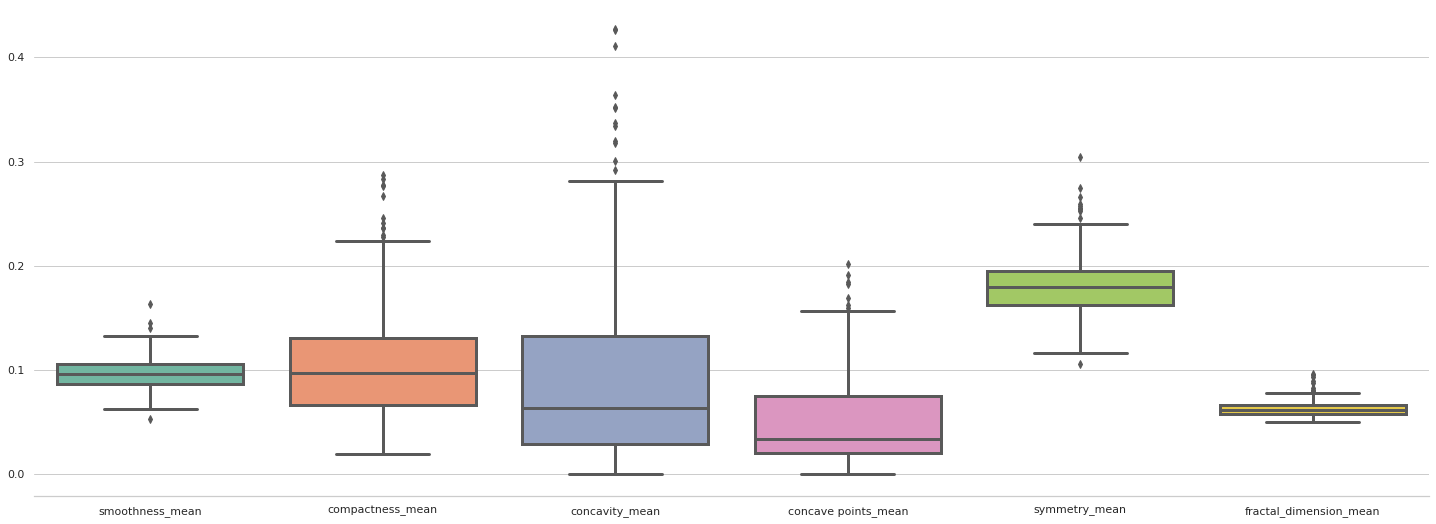

In [14]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[4,5,6,7,8,9]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

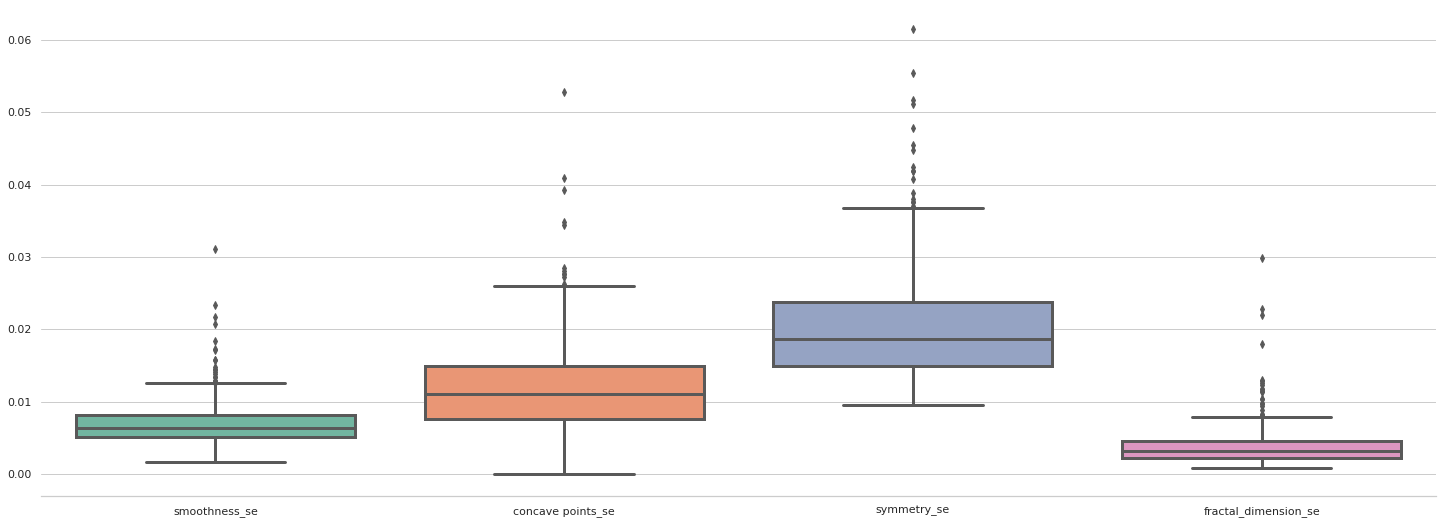

In [15]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[14, 17, 18, 19]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

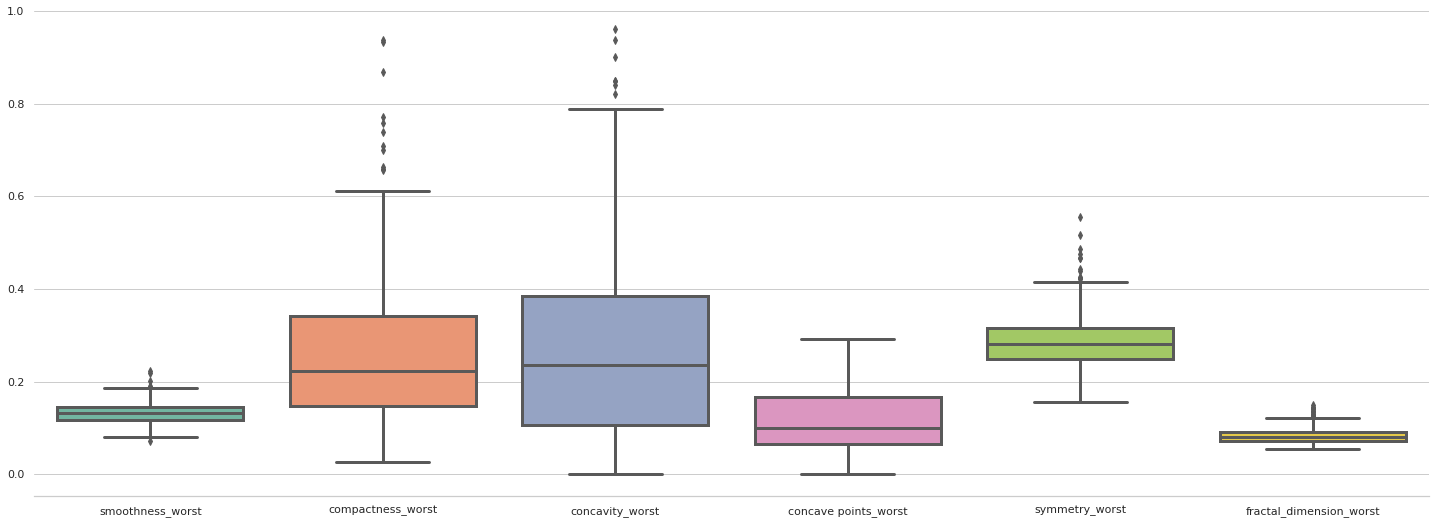

In [16]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[24, 25, 26, 27, 28, 29]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

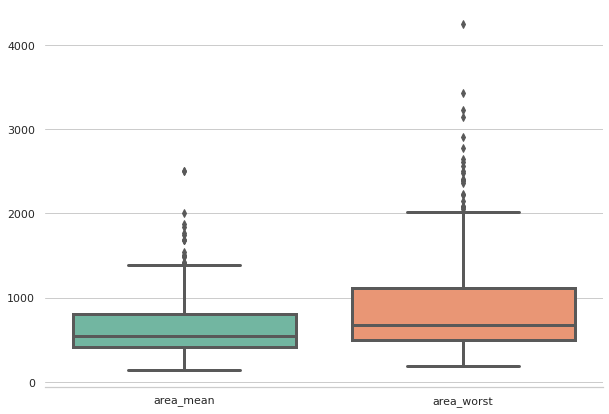

In [17]:
sns.set(rc={'figure.figsize':(10,7)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[3, 23]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

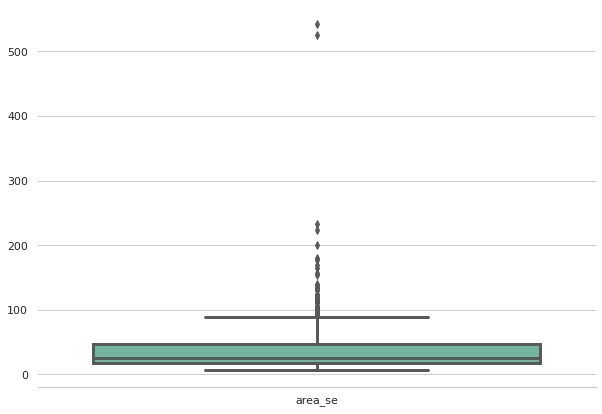

In [18]:
sns.set(rc={'figure.figsize':(10,7)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[13]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

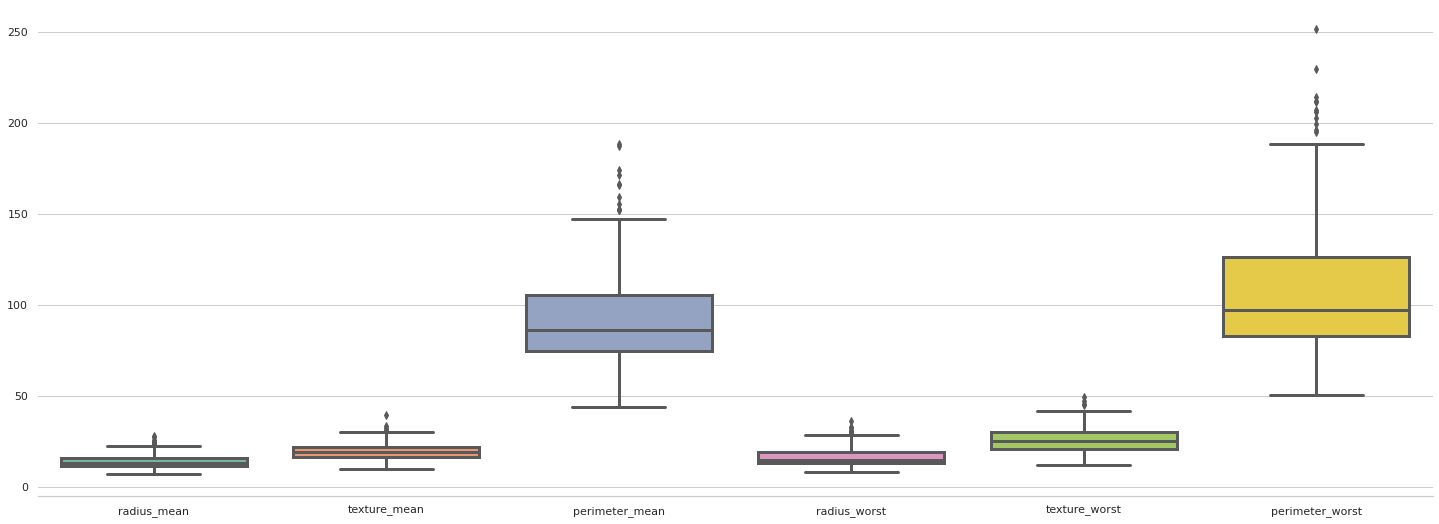

In [19]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[0,1,2,20,21,22]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

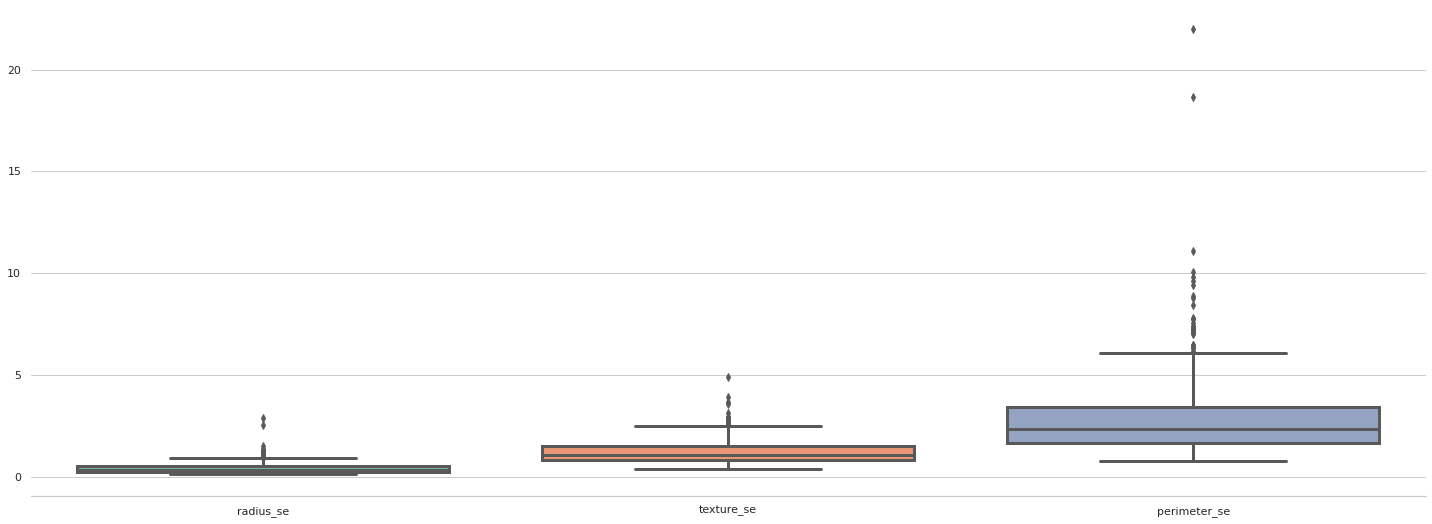

In [20]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[10,11,12]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

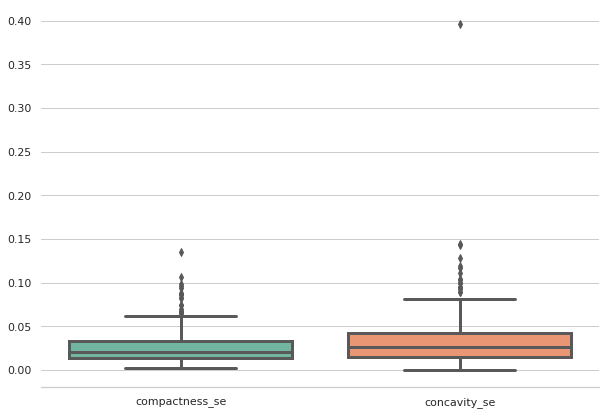

In [21]:
sns.set(rc={'figure.figsize':(10,7)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Xtrain.iloc[:,[15, 16]], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De acuerdo con los diagrámas de caja anteriores, la mayoría de las características tienen datos atípicos, vamos a eliminarlos usando la técnica LocalOutlierFactor


In [22]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', metric = 'euclidean')
Filtrado = LOF.fit_predict(Xtrain)
NOF = LOF.negative_outlier_factor_

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min())
ground_truth = np.ones(len(Xtrain), dtype = int)
n_errors = (Filtrado != ground_truth).sum()

In [23]:
print("Número de muestras o filas con datos atípicos: ", n_errors)

Número de muestras o filas con datos atípicos:  20


Ahora vamos a eliminar las muestras que el algoritmo determinó como datos atípicos

In [24]:
pos = np.asarray(Filtrado)
pos = np.hstack(pos)
print(pos)
XtrainLOF = Xtrain.loc[pos == 1, :]
newY = []
for idx, x in enumerate(Ytrain):
    if pos[idx] == 1:
      newY.append(x)
YtrainLOF = pd.Series(newY)
YtrainLOF = Ytrain.loc[pos == 1]
print("Número de muestras sin outilers:", XtrainLOF.shape)

[ 1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [25]:
print("Número de muestras malignas de entrenamiento: ", np.sum(YtrainLOF == 'M'))
print("Número de muestras benignas de entrenamiento: ", np.sum(YtrainLOF == 'B'))

Número de muestras malignas de entrenamiento:  137
Número de muestras benignas de entrenamiento:  241


### REDUCCIÓN DE DIMENSIONALIDAD


Dado que tenemos muchas carácterísticas queremos ver a cuántas es posible reducir la dimensionalidad usando PCA


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [27]:
sc = StandardScaler()
X_datos = sc.fit_transform(XtrainLOF)
modelo_pca = PCA()
modelo_pca.fit(X_datos)

PCA()

In [28]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = XtrainLOF.columns
)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.225657,0.111911,0.232864,0.227381,0.126697,0.232940,0.252986,0.259569,0.126947,0.042346,0.210330,0.004616,0.217163,0.221296,-0.019652,0.158286,0.142573,0.178812,0.010367,0.085463,0.231693,0.116038,0.239601,0.227456,0.120626,0.212428,0.231456,0.250212,0.127623,0.130575
1,-0.212104,-0.067840,-0.194243,-0.207710,0.196436,0.162689,0.077176,-0.019396,0.188100,0.369912,-0.075907,0.097123,-0.054665,-0.136313,0.242883,0.255744,0.224098,0.161216,0.198640,0.307578,-0.207134,-0.067416,-0.187672,-0.203991,0.155006,0.126937,0.087292,-0.010412,0.098184,0.269644
2,-0.001583,0.145735,-0.003971,0.025013,-0.168542,-0.084533,-0.003967,-0.025767,-0.054562,-0.038866,0.265398,0.425385,0.267242,0.187080,0.224890,0.138530,0.159908,0.198493,0.316142,0.185908,-0.012775,0.072072,-0.016588,0.015873,-0.301492,-0.217797,-0.158035,-0.157684,-0.261155,-0.219291
3,-0.060806,0.582865,-0.058786,-0.067759,-0.021009,-0.006500,-0.023566,-0.044237,-0.051915,-0.006796,-0.104274,0.330637,-0.095574,-0.099595,0.037625,-0.047846,-0.106048,-0.166730,-0.077091,-0.080667,-0.030743,0.626558,-0.026451,-0.038723,0.139047,0.111817,0.066221,0.005178,0.064148,0.110710
4,0.016759,0.061717,0.019653,-0.007793,-0.385654,0.020627,0.091696,-0.050737,-0.343835,-0.023647,-0.173520,-0.124035,-0.123963,-0.133239,-0.271068,0.252672,0.325279,0.139773,-0.289017,0.233318,-0.020997,0.039178,-0.005169,-0.045947,-0.301230,0.150651,0.189828,0.045684,-0.250421,0.137540
5,0.005707,0.051792,0.004599,-0.017799,-0.281449,-0.015194,0.008998,-0.046060,0.387407,-0.140716,-0.073929,-0.015855,-0.040984,-0.083805,-0.344317,0.074033,0.065408,-0.031186,0.410197,-0.068495,-0.025237,0.023969,-0.013258,-0.056080,-0.349271,0.087691,0.059910,-0.026828,0.534432,-0.067962
6,-0.033541,0.009693,-0.029174,0.029501,-0.178616,0.035514,-0.137641,-0.115774,-0.044626,0.345865,0.206154,-0.091611,0.182963,0.225531,-0.105453,0.019333,-0.287514,-0.443281,-0.002319,0.285531,0.063134,-0.037272,0.059864,0.137923,-0.153451,0.084319,-0.137960,-0.199023,0.042058,0.428322
7,-0.022402,-0.025574,-0.011962,-0.052968,0.354234,0.113530,0.061345,0.111785,0.266624,0.212460,0.033929,0.323760,0.067774,-0.009980,-0.631586,-0.164734,-0.001722,0.067333,-0.239180,0.011757,-0.064300,0.009808,-0.055732,-0.097187,-0.183739,-0.134728,-0.097298,-0.005019,-0.219160,-0.015370
8,-0.134733,0.151098,-0.151814,-0.105400,-0.106661,-0.274891,-0.020248,-0.144830,0.369312,-0.055504,0.243397,-0.326750,0.084977,0.168668,0.031407,-0.191076,0.354490,0.111208,-0.375739,0.184577,0.012804,0.140094,-0.029708,0.050425,0.139301,-0.248529,0.007699,-0.053983,0.131123,-0.007347
9,-0.133131,-0.333007,-0.142976,-0.097754,-0.007373,-0.227114,0.100165,-0.118092,-0.366145,-0.095824,0.167696,0.364322,0.101947,0.152365,-0.233418,-0.172842,0.286399,-0.179958,0.116069,-0.087862,0.001887,-0.015282,-0.006514,0.047333,0.249416,0.045866,0.315000,0.016347,0.181538,0.093948


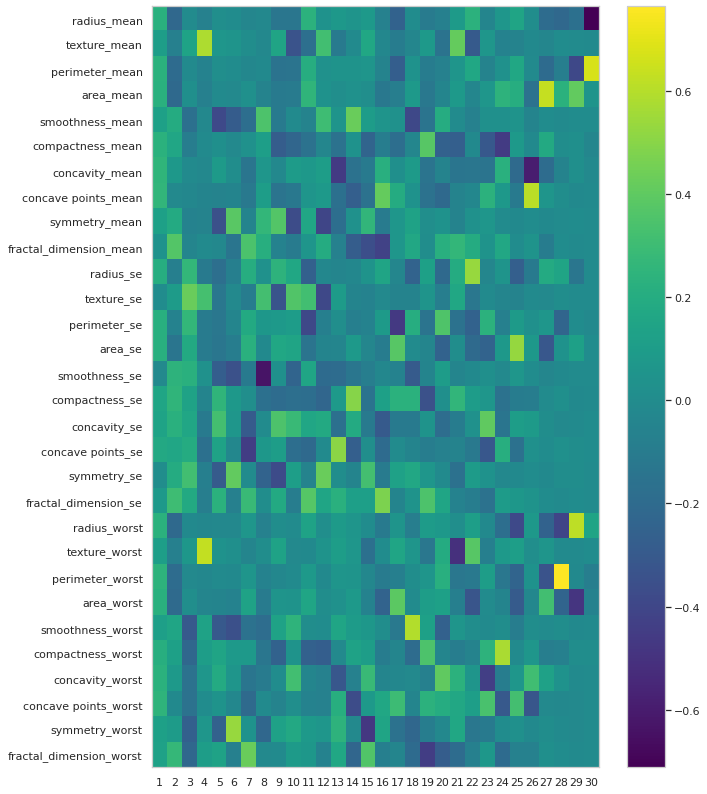

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 14))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(XtrainLOF.columns)), XtrainLOF.columns)
plt.xticks(range(len(XtrainLOF.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [30]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[4.52739169e-01 1.93392242e-01 9.20803258e-02 6.31963268e-02
 5.28357977e-02 4.00966117e-02 2.00938800e-02 1.62339153e-02
 1.33901286e-02 1.04726670e-02 1.02393562e-02 8.14066058e-03
 7.00240635e-03 5.24750354e-03 2.90021423e-03 2.54095047e-03
 1.77344970e-03 1.48639862e-03 1.16212134e-03 1.08955981e-03
 9.17744342e-04 7.68553456e-04 6.95106332e-04 5.31811007e-04
 4.46132354e-04 2.42226411e-04 2.12501742e-04 5.08700726e-05
 1.77252547e-05 3.64486740e-06]


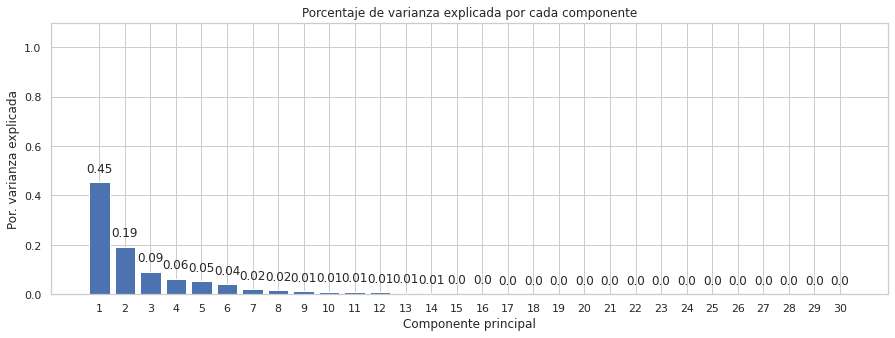

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(XtrainLOF.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

De lo anterior concluimos que si queremos aplicar PCA podemos hacerlo hasta reducir el dataset a 6 características numéricas

Veamos la distribución de las variables y cómo se relacionan en pares

In [32]:
#sns.pairplot(Xtrain)

# ITERACIONES


In [33]:
print(XtrainLOF.shape)
print(YtrainLOF.shape)
print(Xtest.shape)
print(Ytest.shape)

(378, 30)
(378,)
(171, 30)
(171,)


## ITERACION 1: KNeighborsClassifier

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
np.random.seed(4)
k=[1,3,5,7,9,11]
parameters = {'n_neighbors':k, 'metric':['euclidean','manhattan','chebyshev']}
st = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
knpca_pipeline = Pipeline(steps=
                   [('scl', StandardScaler()),
                    ('pca', PCA(n_components=7)),
                    ('clf', GridSearchCV(estimator=KNeighborsClassifier(), param_grid = parameters, cv=st, scoring='accuracy', return_train_score=True))])

In [41]:
KNCClassifier = knpca_pipeline.fit(XtrainLOF, YtrainLOF)

Vamos a usar un GridSearch para buscar la mejor combinación de hiperparámetros

Revisemos la matriz de confusión

Text(0.5, 1.0, 'CM')

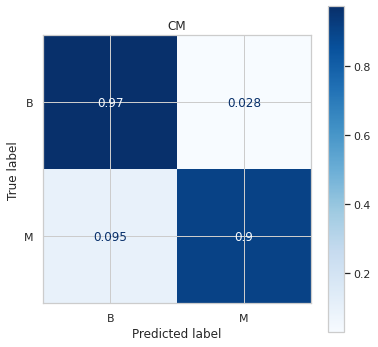

In [43]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(
    KNCClassifier, Xtest, Ytest,
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax)

disp.ax_.set_title('CM')

In [44]:
Ypred = KNCClassifier.predict(Xtest)
tn, fp, fn, tp = confusion_matrix(Ytest, Ypred).ravel()

specificity = tn / (tn+fp)
sensibility = tp / (fn+tp)

print('Specificity = '+str(specificity))
print('Sensibility = '+str(sensibility))
print('Accuracy = '+str(accuracy_score(Ytest, Ypred)))

Specificity = 0.9722222222222222
Sensibility = 0.9047619047619048
Accuracy = 0.9473684210526315


REPETIMOS ESTE PIPELINE SIN PCA


In [45]:
kn_pipeline = Pipeline(steps=
                   [('scl', StandardScaler()),
                    ('clf', GridSearchCV(estimator=KNeighborsClassifier(), param_grid = parameters, cv=st, scoring='accuracy', return_train_score=True))])

In [46]:
KNCClassifier2 = kn_pipeline.fit(XtrainLOF, YtrainLOF)

Text(0.5, 1.0, 'CM')

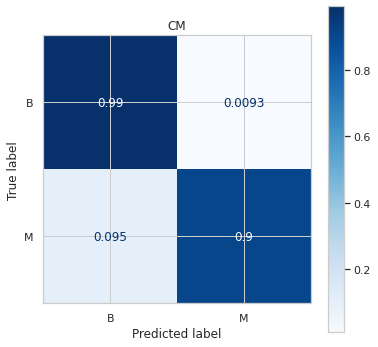

In [47]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(
    KNCClassifier2, Xtest, Ytest,
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax)

disp.ax_.set_title('CM')

In [48]:
Ypred = KNCClassifier2.predict(Xtest)
tn, fp, fn, tp = confusion_matrix(Ytest, Ypred).ravel()

specificity = tn / (tn+fp)
sensibility = tp / (fn+tp)

print('Specificity = '+str(specificity))
print('Sensibility = '+str(sensibility))
print('Accuracy = '+str(accuracy_score(Ytest, Ypred)))

Specificity = 0.9907407407407407
Sensibility = 0.9047619047619048
Accuracy = 0.9590643274853801


## ITERACION 2: Random Forest Classfier


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rfpca_pipeline = Pipeline(steps=
                   [('pca', PCA(n_components=7)),
                    ('clf', GridSearchCV(estimator=RandomForestClassifier(), param_grid = rf_params, cv=st, scoring='accuracy', return_train_score=True))])

In [50]:
RFPCAClassifier = rfpca_pipeline.fit(XtrainLOF, YtrainLOF)

Text(0.5, 1.0, 'CM')

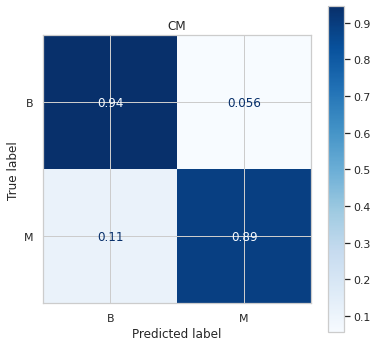

In [51]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(
    RFPCAClassifier, Xtest, Ytest,
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax)

disp.ax_.set_title('CM')

In [52]:
Ypred = RFPCAClassifier.predict(Xtest)
tn, fp, fn, tp = confusion_matrix(Ytest, Ypred).ravel()

specificity = tn / (tn+fp)
sensibility = tp / (fn+tp)

print('Specificity = '+str(specificity))
print('Sensibility = '+str(sensibility))
print('Accuracy = '+str(accuracy_score(Ytest, Ypred)))

Specificity = 0.9444444444444444
Sensibility = 0.8888888888888888
Accuracy = 0.9239766081871345


Ahora sin PCA


In [53]:
rf_pipeline = Pipeline(steps=
                   [('clf', GridSearchCV(estimator=RandomForestClassifier(), param_grid = rf_params, cv=st, scoring='accuracy', return_train_score=True))])

In [54]:
RFClassifier = rf_pipeline.fit(XtrainLOF, YtrainLOF)

Text(0.5, 1.0, 'CM')

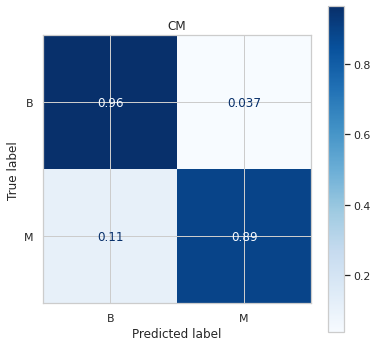

In [55]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(
    RFClassifier, Xtest, Ytest,
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax)

disp.ax_.set_title('CM')

In [56]:
Ypred = RFClassifier.predict(Xtest)
tn, fp, fn, tp = confusion_matrix(Ytest, Ypred).ravel()

specificity = tn / (tn+fp)
sensibility = tp / (fn+tp)

print('Specificity = '+str(specificity))
print('Sensibility = '+str(sensibility))
print('Accuracy = '+str(accuracy_score(Ytest, Ypred)))

Specificity = 0.9629629629629629
Sensibility = 0.8888888888888888
Accuracy = 0.935672514619883


## ITERACION 3: SVM

Implementemos una máquina de soporte vectorial con los parámetros por defecto y miremos los resultados

In [59]:
from sklearn.svm import SVC
svc_params = {
    'kernel': ['linear'],
    'random_state': [0]
}
svmpca_pipeline = Pipeline(steps=
                   [('scl', StandardScaler()),
                    ('pca', PCA(n_components=7)),
                    ('clf', SVC(kernel ="linear", random_state=0))])


In [60]:
SVCPCAClassifier = svmpca_pipeline.fit(XtrainLOF, YtrainLOF)

Text(0.5, 1.0, 'CM')

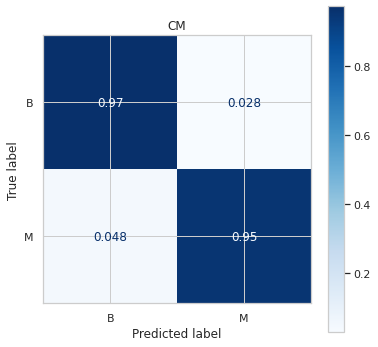

In [61]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(
    SVCPCAClassifier, Xtest, Ytest,
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax)

disp.ax_.set_title('CM')

In [62]:
Ypred = SVCPCAClassifier.predict(Xtest)
tn, fp, fn, tp = confusion_matrix(Ytest, Ypred).ravel()

specificity = tn / (tn+fp)
sensibility = tp / (fn+tp)

print('Specificity = '+str(specificity))
print('Sensibility = '+str(sensibility))
print('Accuracy = '+str(accuracy_score(Ytest, Ypred)))

Specificity = 0.9722222222222222
Sensibility = 0.9523809523809523
Accuracy = 0.9649122807017544


SIN PCA



In [63]:
from sklearn.svm import SVC
svc_params = {
    'kernel': ['linear'],
    'random_state': [0]
}
svm_pipeline = Pipeline(steps=
                   [('scl', StandardScaler()),
                    ('clf', SVC(kernel ="linear", random_state=0))])

In [64]:
SVCClassifier = svm_pipeline.fit(XtrainLOF, YtrainLOF)

Text(0.5, 1.0, 'CM')

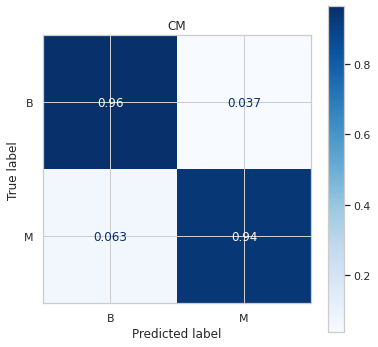

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(
    SVCClassifier, Xtest, Ytest,
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax)

disp.ax_.set_title('CM')

In [66]:
Ypred = SVCClassifier.predict(Xtest)
tn, fp, fn, tp = confusion_matrix(Ytest, Ypred).ravel()

specificity = tn / (tn+fp)
sensibility = tp / (fn+tp)

print('Specificity = '+str(specificity))
print('Sensibility = '+str(sensibility))
print('Accuracy = '+str(accuracy_score(Ytest, Ypred)))

Specificity = 0.9629629629629629
Sensibility = 0.9365079365079365
Accuracy = 0.9532163742690059
